In [40]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [58]:
from prophet import Prophet

In [59]:
data = pd.read_csv('../data/master.csv')
data.shape

(15214, 33)

In [60]:
def extract_date(data):
    date, _ = data.split(' ')
    return date

In [61]:
data['date'] = data['timestamp'].apply(lambda x : extract_date(x))
data['date'] =  pd.to_datetime(data['date'])
data['timestamp'] = pd.to_datetime(data['timestamp'])
columns_select = ['date', 'Case-Id', 'sorting']
df = data[columns_select]
#df.head()

In [62]:
df = df[df['sorting'] == 1]
df = df.drop('sorting', axis=1)
df  = df.groupby('date').agg(['count'])
df = df.reset_index()
#df.head()

In [63]:
df.columns = ['ds', 'y']
start_date = '2014-01-01'
end_date =  '2015-03-01'
mask = (df['ds'] > start_date) & (df['ds'] <= end_date)
df = df.loc[mask]

In [64]:
df.head()

,ds,y
44,2014-01-02,2
45,2014-01-04,5
46,2014-01-05,2
47,2014-01-06,3
48,2014-01-07,1


In [65]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [66]:
m = Prophet()
m.fit(df)

In [67]:
future = m.make_future_dataframe(periods=30)
#future.tail()

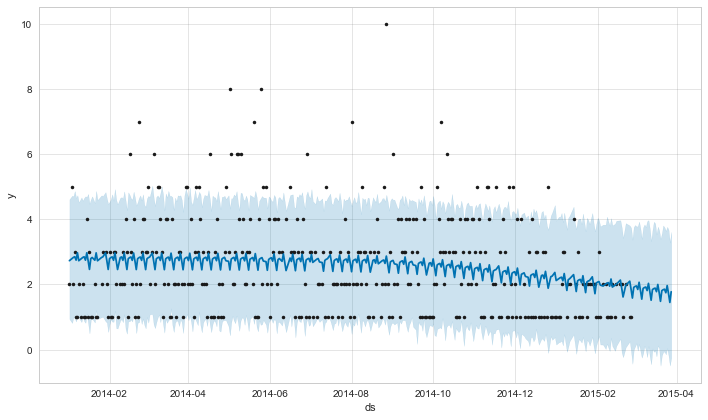

In [68]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

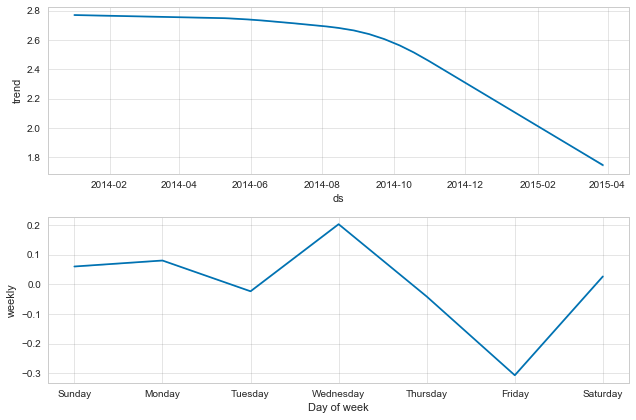

In [69]:
m.plot_components(forecast);

In [70]:
import numpy as np

In [71]:
np.bincount

<function numpy.core.multiarray.bincount>

In [72]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '7 days')

In [ ]:
df_cv.head(7)